Use this code to visualize the final meshes that we need to create.

In [1]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# get vertices from ply file
def read_ply(file_path):
    vertices = []
    vertex_count = 0
    start_reading = False
    
    with open(file_path, 'r') as f:
        for line in f:
            if 'element vertex' in line:
                vertex_count = int(line.split()[-1])
            elif 'end_header' in line:
                start_reading = True
                continue
            elif start_reading and vertex_count > 0:
                try:
                    x, y, z = map(float, line.split()[:3])
                    vertices.append([x, y, z])
                    vertex_count -= 1
                except:
                    continue
                
    return np.array(vertices)

def plot_point_cloud(points, subsample=1, point_size=1):
    
    points = points[::subsample]
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]
    
    colors = z - z.min()
    colors = colors / colors.max()
    
    scatter = ax.scatter(x, y, z, 
                        c=colors,
                        cmap='viridis',
                        s=point_size,
                        alpha=0.6)
    
    plt.colorbar(scatter, label='Height')
    
    # labs
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # axis limits
    max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max() / 2.0
    mid_x = (x.max()+x.min()) * 0.5
    mid_y = (y.max()+y.min()) * 0.5
    mid_z = (z.max()+z.min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    # camera bounds
    ax.set_box_aspect((1,1,1))
    ax.view_init(elev=30, azim=45)
    
    plt.title('Point Cloud Visualization')
    return fig, ax

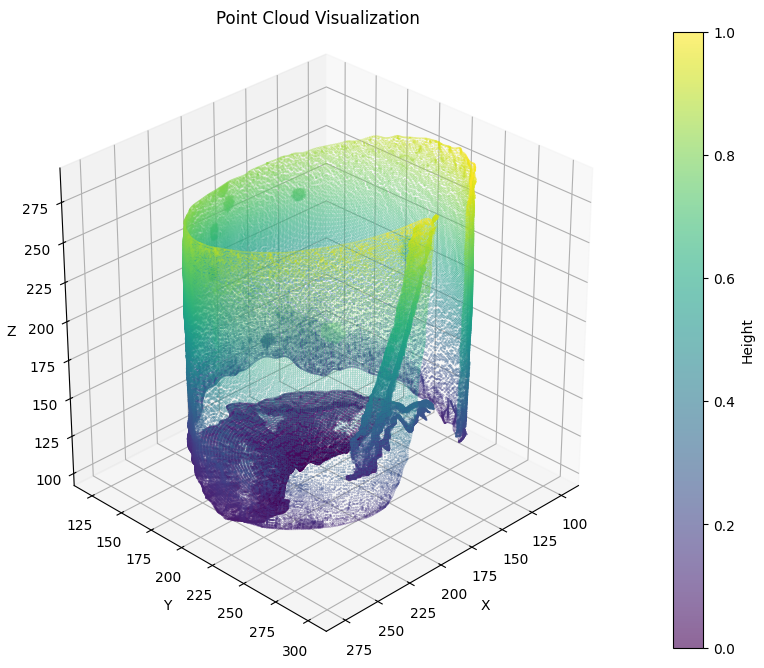

array([[190.9994049, 238.6444092, 113.9364319],
       [191.043396 , 240.3185272, 114.5961838],
       [191.0174866, 241.9680328, 115.1381989],
       ...,
       [167.5753632, 272.6679382, 276.6875   ],
       [164.7474365, 270.1283875, 278.0464783],
       [166.4378357, 271.6807556, 276.984375 ]])

In [4]:
# "../../meshes/scan_005.ply"
file_path = "/home/sid/DeepView/meshes/scan_005.ply"
points = read_ply(file_path)

# point size increase: bigger dots
# subsample increases: fewer points
fig, ax = plot_point_cloud(points, subsample=1, point_size=0.1)  # takes every 10th point
plt.show()

points

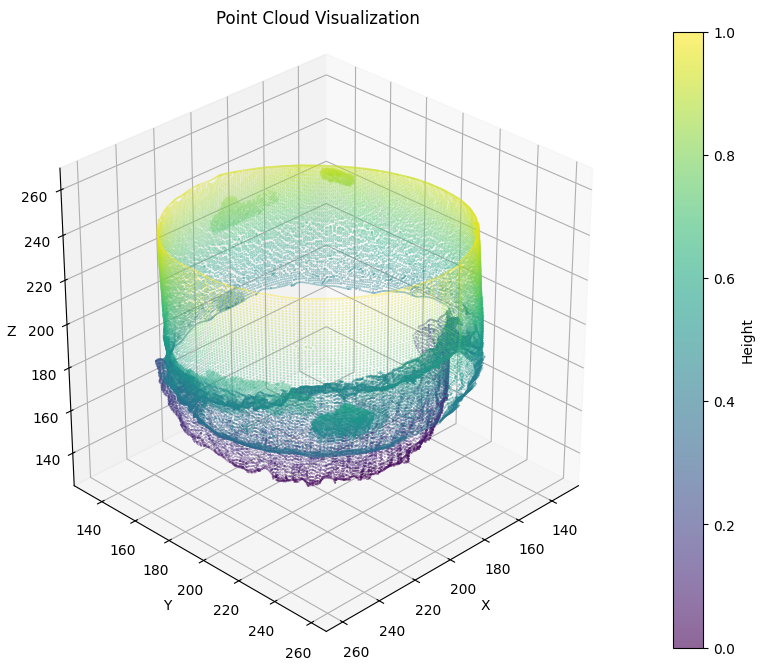

In [11]:
# "../../meshes/scan_005.ply"
file_path = "DeepView/meshes/scan_002.ply"
points = read_ply(file_path)

# point size increase: bigger dots
# subsample increases: fewer points
fig, ax = plot_point_cloud(points, subsample=1, point_size=0.1)  # takes every 10th point
plt.show()

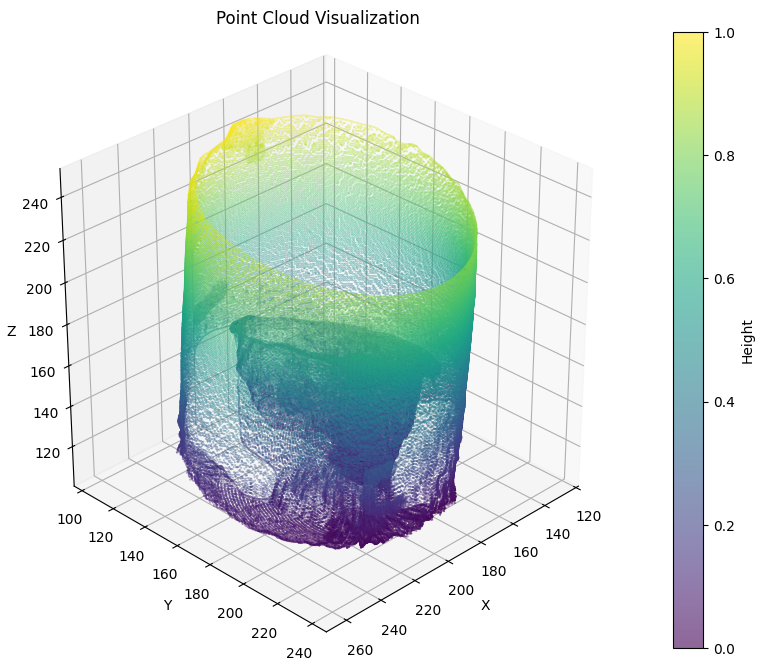

In [17]:
# "../../meshes/scan_004.ply"
file_path = "../../meshes/scan_004.ply"
points = read_ply(file_path)

# point size increase: bigger dots
# subsample increases: fewer points
fig, ax = plot_point_cloud(points, subsample=1, point_size=0.1)  # takes every 10th point
plt.show()

In [18]:
# "../../meshes/scan_004.ply"
file_path = "../../meshes/scan_003.ply"
points = read_ply(file_path)

# point size increase: bigger dots
# subsample increases: fewer points
fig, ax = plot_point_cloud(points, subsample=1, point_size=0.1)  # takes every 10th point
plt.show()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 258: invalid start byte